# Modified Page Rank Algorithm

### Importing libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as mat
import math
import random
import numpy as np
import pandas as pd

### Creating adjacency matrix  

In [2]:
n=10
init_prob=[1/n]*n 
adj_matrix=[]
for i in range(n):
    adj1=[]
    for j in range(n):
        adjl=[]
        if(random.random()>0.5):
            #appending adjacency matrix
            adj1.append(1)
        else:
            adj1.append(0)                     
    adj_matrix.append(adj1)

## Created adjacency matrix

In [3]:
adj_matrix

[[1, 0, 1, 0, 0, 1, 1, 0, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
 [0, 1, 1, 1, 1, 0, 0, 0, 1, 0],
 [1, 0, 1, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
 [0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 1, 0, 0, 1, 1],
 [1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]]

## Plotting The Graph Circularly

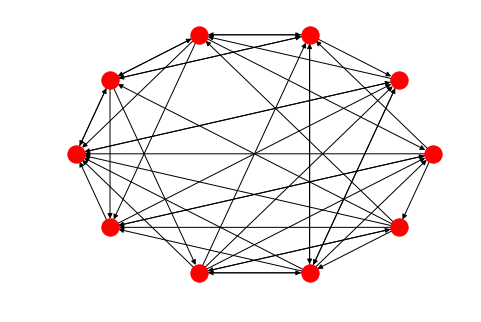

In [4]:
adj=pd.DataFrame(adj_matrix)
G = nx.DiGraph(adj.values)
nx.draw_circular(G)

## Plotting The Graph normally

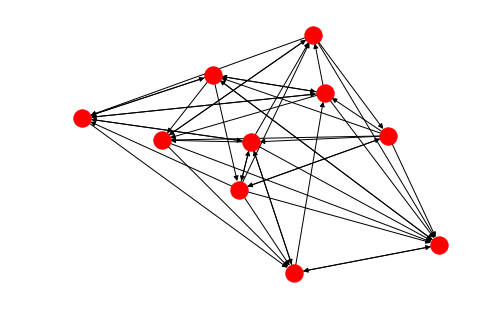

In [5]:
nxG = nx.DiGraph(adj.values)
nx.draw(nxG)

## Calculating the Jumping probability and Damping factor

In [6]:
jump_prob=[]
for i in range(n):
    jump_prob.append(random.random())
s=sum(jump_prob)    
j=np.array(jump_prob)/s
j=list(j)
c=random.random()#Damping factor

## Printing damping factor

In [7]:
c

0.9249179129533099

## Printing Jumping Probability

In [8]:
j

[0.15045059237630484,
 0.061140386755036955,
 0.033178899018301365,
 0.011580988023885555,
 0.06283279017670651,
 0.16317756696338048,
 0.12002930603218517,
 0.10671060164726853,
 0.1264110633258051,
 0.1644878056811254]

## Transition Probability

In [9]:
trans_prob=[]
for i in range(n):
    trans_prob.append(list(np.array(adj_matrix[i])/sum(adj_matrix[i])))
pd.DataFrame(trans_prob)

,0,1,2,3,4,5,6,7,8,9
0,0.200000,0.000000,0.200000,0.000000,0.000000,0.200000,0.200000,0.000000,0.000000,0.200000
1,0.000000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000
2,0.000000,0.200000,0.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.200000,0.000000
3,0.200000,0.000000,0.200000,0.000000,0.200000,0.200000,0.200000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.000000,0.000000
5,0.000000,0.333333,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000
6,0.333333,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000
7,0.166667,0.166667,0.166667,0.000000,0.000000,0.166667,0.000000,0.000000,0.166667,0.166667
8,0.166667,0.166667,0.166667,0.000000,0.000000,0.166667,0.166667,0.166667,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857


In [10]:
trans_prob = np.array(trans_prob)

## Calculating Page Rank 

In [11]:
init_prob_prev=[]
c = 0.8
zero_array=[0]*n
for i in range(2000):
    init_prob_prev=init_prob
    init_prob=c*np.dot(init_prob,trans_prob)+np.dot(j,1-c)
    if(list(init_prob-init_prob_prev)==zero_array):
        print(i)
        break

26


## Updated Probability

In [12]:
init_prob

array([0.09706436, 0.1510746 , 0.07910591, 0.06754079, 0.11372   ,
       0.20751464, 0.08371398, 0.05471342, 0.08263926, 0.06291304])

In [13]:
sum(init_prob)

0.9999999999999999